# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data from mall.csv file
df = pd.read_csv("mall.csv")

In [3]:
#get data throgh head() method 
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


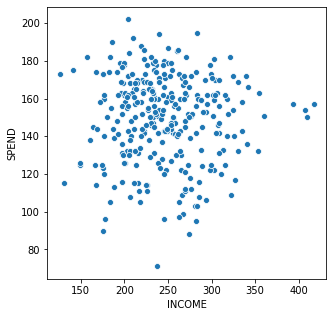

In [4]:
#make scatter plot for it 
plt.figure(figsize=(5,5))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.show()

## KMeans

In [5]:
#import required modules for clusters
from sklearn.cluster import KMeans

In [6]:
#create kmeans object initialised all respective parameter
ke1 = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300,random_state=1)
ke1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [7]:
#calculate inertia
ke1.inertia_

297101.3764201943

In [8]:
#get list of all centroids
centroids = ke1.cluster_centers_

In [9]:
centroids

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [10]:
#now we have x as well as y for centeroid in dataframe
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])

In [11]:
#centaroid dataframe
centroid_df

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


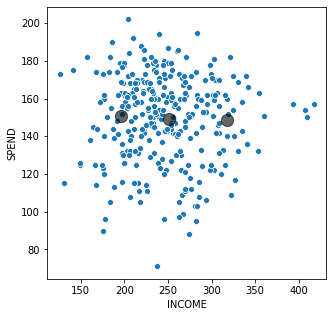

In [12]:
#plot data with centroid to understand what happen
plt.figure(figsize=(5,5))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

## K values and Elbow method

In [13]:
#between cluster sum of squared 
bcss = []
for k in range(1,30):
    ke2 = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300,random_state=1)
    ke2.fit(df)
    bcss.append(ke2.inertia_)

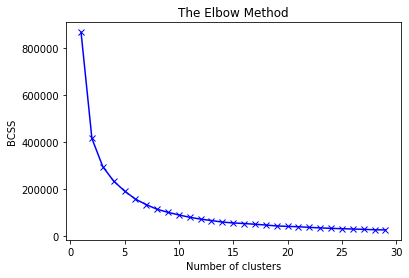

In [14]:
#plot data 
plt.plot(range(1,30),bcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('BCSS')
plt.show()

In [15]:
ke3 = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300,random_state=1)

In [16]:
#we got common between data on based of clusters
labels = ke3.fit_predict(df)

In [17]:
#calculate inertia
ke3.inertia_

193333.51167275637

In [18]:
centroids = ke3.cluster_centers_
centroids

array([[199.38709677, 168.08064516],
       [249.6407767 , 159.75728155],
       [269.94444444, 115.61111111],
       [321.34615385, 153.23076923],
       [196.3       , 126.74      ]])

In [19]:
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])
centroid_df

,X,Y
0,199.387097,168.080645
1,249.640777,159.757282
2,269.944444,115.611111
3,321.346154,153.230769
4,196.300000,126.740000


In [20]:
labels

array([1, 1, 0, 1, 3, 0, 3, 1, 0, 0, 1, 2, 1, 4, 1, 0, 3, 4, 1, 1, 1, 1,
       0, 1, 0, 3, 0, 4, 3, 0, 0, 4, 0, 1, 4, 0, 3, 1, 1, 3, 3, 1, 0, 1,
       3, 3, 1, 1, 4, 1, 1, 3, 1, 0, 1, 0, 0, 1, 0, 3, 2, 3, 0, 4, 0, 0,
       4, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 3, 3, 2, 1, 1, 0,
       0, 2, 1, 0, 0, 3, 4, 4, 3, 1, 3, 1, 1, 1, 0, 1, 0, 4, 1, 1, 1, 1,
       3, 0, 3, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 4, 1, 0, 2, 0, 1,
       3, 1, 3, 1, 4, 4, 4, 2, 3, 3, 0, 4, 4, 1, 1, 1, 1, 0, 1, 4, 1, 1,
       0, 4, 1, 0, 4, 0, 1, 3, 0, 0, 0, 2, 4, 1, 1, 0, 1, 1, 1, 0, 4, 4,
       1, 3, 4, 2, 3, 4, 3, 1, 2, 3, 1, 2, 1, 0, 3, 4, 4, 2, 0, 3, 1, 1,
       2, 1, 0, 1, 2, 1, 4, 1, 1, 1, 4, 0, 1, 1, 4, 3, 1, 3, 2, 3, 2, 1,
       3, 4, 1, 2, 2, 4, 2, 4, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 1,
       4, 2, 4, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 4, 1, 1, 1, 1, 2, 1,
       4, 4, 3, 4, 2, 2, 1, 1, 2, 1, 2, 0, 4, 1, 3, 4, 3, 0, 4, 0, 4, 3,
       0, 1, 3, 4, 0, 3, 1, 0, 4, 4, 4, 4, 2, 2, 4,

In [21]:
df_new = pd.concat([df, pd.DataFrame({'labels':labels})], axis=1)

In [22]:
df_new.head()


,INCOME,SPEND,labels
0,233,150,1
1,250,187,1
2,204,172,0
3,236,178,1
4,354,163,3


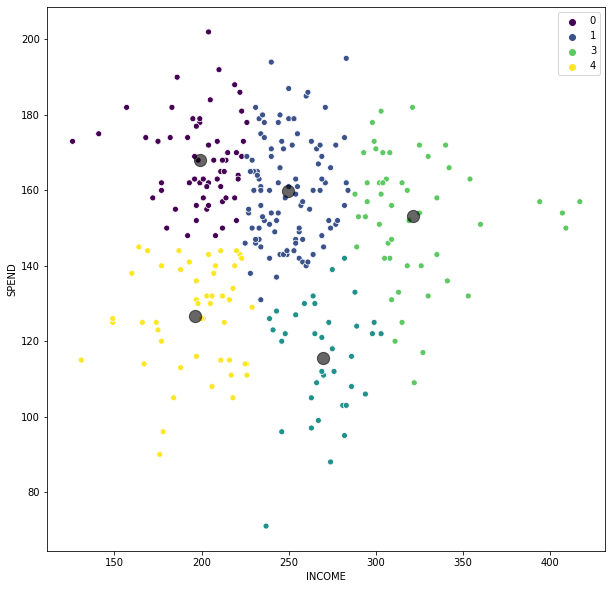

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["INCOME"],y=df["SPEND"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()